In [52]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [53]:
from google.colab import files
uploaded = files.upload()

Saving Bitter_Gourd_Final.csv to Bitter_Gourd_Final (1).csv


In [54]:
from sklearn.preprocessing import MinMaxScaler
import io

df = pd.read_csv(io.BytesIO(uploaded['Bitter_Gourd_Final.csv']), index_col='Date', infer_datetime_format=True,parse_dates=True)
df.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2021-05-04', '2021-05-05', '2021-05-06', '2021-05-07',
               '2021-05-08', '2021-05-09', '2021-05-10', '2021-05-11',
               '2021-05-12', '2021-05-13'],
              dtype='datetime64[ns]', name='Date', length=1960, freq=None)

In [55]:
df = df [['Maximum Temperature(Avg)','Minimum Temperature(Avg)','Precipitation', 'Average_Price']]

In [56]:
df.head()

,Maximum Temperature(Avg),Minimum Temperature(Avg),Precipitation,Average_Price
Date,,,,
2016-01-01,19.5,3.2,0.0,85.0
2016-01-02,18.8,4.2,0.0,85.0
2016-01-03,19.4,3.5,0.0,95.0
2016-01-04,19.5,4.0,0.0,95.0
2016-01-05,19.2,3.5,0.0,95.0


In [57]:
len(df)

1960

In [58]:

train_df,test_df = df[0:1800], df[1800:] 

In [11]:
test_df

,Maximum Temperature(Avg),Minimum Temperature(Avg),Precipitation,Average_Price
Date,,,,
2020-12-05,20.6,7.2,0.0,75.0
2020-12-06,20.5,7.2,0.0,65.0
2020-12-07,19.8,7.5,0.0,65.0
2020-12-08,20.0,7.0,0.0,65.0
2020-12-09,20.2,10.2,0.0,55.0
...,...,...,...,...
2021-05-09,28.5,14.5,0.0,13.5
2021-05-10,28.2,14.3,1.1,17.5
2021-05-11,26.4,15.0,10.6,17.5


In [59]:
train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [60]:
test.shape

(160, 4)

In [61]:
test_df.columns

Index(['Maximum Temperature(Avg)', 'Minimum Temperature(Avg)', 'Precipitation',
       'Average_Price'],
      dtype='object')

In [62]:
def split_series_train(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

def split_series_test(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end <= len(series):
      past, future = series[window_start:past_end, :], series[past_end:future_end, :]
      X.append(past)
      y.append(future)  
    else:
      if(past_end) <= len(series):
        past= series[window_start:past_end, :]
        X.append(past)
      else:
        break
  return np.array(X), np.array(y)

In [63]:
n_past = 114
n_future = 30 
n_features = 4

In [64]:
X_train, y_train = split_series_train(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series_test(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

In [65]:
X_test.shape

(47, 114, 4)

In [66]:
# E1D1
# n_features ==> no of features at each timestep in the data.
#
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, activation='relu',return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

decoder_l1 = tf.keras.layers.LSTM(100, activation='relu',return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

model_e1d1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 114, 4)]     0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 100),        42000       ['input_3[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 repeat_vector_2 (RepeatVector)  (None, 30, 100)     0           ['lstm_4[0][0]']                 
                                                                                            

In [67]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber(), metrics='accuracy')
history=model_e1d1.fit(X_train,y_train,epochs=63,validation_split=0.1,batch_size=16,callbacks=[reduce_lr])

Epoch 1/63
94/94 [==============================] - 10s 80ms/step - loss: 0.0395 - accuracy: 0.6763 - val_loss: 0.0201 - val_accuracy: 0.7522 - lr: 0.0010
Epoch 2/63
94/94 [==============================] - 7s 77ms/step - loss: 0.0150 - accuracy: 0.7676 - val_loss: 0.0196 - val_accuracy: 0.7681 - lr: 9.0000e-04
Epoch 3/63
94/94 [==============================] - 7s 77ms/step - loss: 0.0126 - accuracy: 0.7762 - val_loss: 0.0162 - val_accuracy: 0.8014 - lr: 8.1000e-04
Epoch 4/63
94/94 [==============================] - 7s 76ms/step - loss: 0.0113 - accuracy: 0.7893 - val_loss: 0.0124 - val_accuracy: 0.8341 - lr: 7.2900e-04
Epoch 5/63
94/94 [==============================] - 7s 76ms/step - loss: 0.0106 - accuracy: 0.7959 - val_loss: 0.0144 - val_accuracy: 0.8171 - lr: 6.5610e-04
Epoch 6/63
94/94 [==============================] - 7s 77ms/step - loss: 0.0108 - accuracy: 0.7903 - val_loss: 0.0119 - val_accuracy: 0.7988 - lr: 5.9049e-04
Epoch 7/63
94/94 [==============================] - 7s 

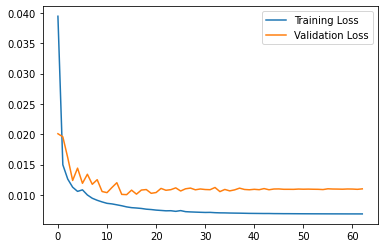

In [68]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

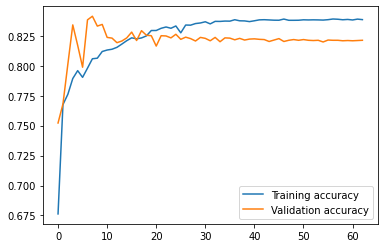

In [69]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [70]:
pred_e1d1=model_e1d1.predict(X_test)

In [71]:
X_test.shape

(47, 114, 4)

In [72]:
pred_e1d1

array([[[ 0.4240983 , -0.04215282, -1.0638937 , -0.31864664],
        [ 0.38461575, -0.03468718, -1.0225564 , -0.37092176],
        [ 0.35059935, -0.02214431, -1.0103872 , -0.39613825],
        ...,
        [ 0.44513243,  0.25070643, -0.9769213 , -0.59745467],
        [ 0.44875944,  0.2554142 , -0.9766381 , -0.60018986],
        [ 0.4520636 ,  0.25975633, -0.9763771 , -0.6025885 ]],

       [[ 0.40204817, -0.03250268, -1.0649215 , -0.33943072],
        [ 0.36435154, -0.02318236, -1.0236106 , -0.3859032 ],
        [ 0.33468002, -0.00755502, -1.01169   , -0.40689224],
        ...,
        [ 0.4605459 ,  0.26545274, -0.97534657, -0.6065826 ],
        [ 0.46428952,  0.27017647, -0.9751606 , -0.6094016 ],
        [ 0.46769667,  0.27452317, -0.97498417, -0.6118722 ]],

       [[ 0.38647786, -0.02394642, -1.0624074 , -0.35537204],
        [ 0.35113963, -0.01264179, -1.0224665 , -0.3984832 ],
        [ 0.32508153,  0.00597354, -1.0108625 , -0.41601166],
        ...,
        [ 0.47498924,  0.27

In [73]:
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

In [74]:
pred_e1d1.shape

(47, 30, 4)

In [75]:
y_pred=pred_e1d1[46,:,3]

In [76]:
y_pred


array([25.362097 , 19.505577 , 16.524935 , 14.78473  , 13.83814  ,
       13.284715 , 12.907762 , 12.612018 , 12.3221035, 12.027076 ,
       11.70827  , 11.391785 , 11.100564 , 10.853307 , 10.640756 ,
       10.454955 , 10.289458 , 10.139266 , 10.000558 ,  9.870418 ,
        9.746802 ,  9.628173 ,  9.513443 ,  9.401923 ,  9.293135 ,
        9.186812 ,  9.082759 ,  8.98092  ,  8.881309 ,  8.783913 ],
      dtype=float32)

# **Preparing dates for the predicted data**

In [77]:
train_df=train_df.reset_index()
test_df=test_df.reset_index()
df1 = pd.read_csv(io.BytesIO(uploaded['Bitter_Gourd_Final.csv']), index_col='Date', infer_datetime_format=True,parse_dates=True)
df1=df1.reset_index()

In [78]:
test_df1=df1[1800:]

In [ ]:
test_df2.head(50)

,Date,Average_Price,Holiday,Maximum Temperature(Avg),Minimum Temperature(Avg),Daily Precipitation
1099,2021-03-30,75.0,0,25.2,10.8,0.01
1100,2021-03-31,85.0,0,27.2,11.5,0.00
1101,2021-04-01,95.0,0,26.8,12.0,9.80
1102,2021-04-02,95.0,0,27.0,13.6,0.00
1103,2021-04-03,95.0,0,27.5,9.6,0.00
1104,2021-04-04,75.0,0,27.9,8.7,0.00
1105,2021-04-05,75.0,0,27.2,9.0,0.00
1106,2021-04-06,65.0,0,27.4,9.6,0.00
1107,2021-04-07,65.0,0,26.7,10.2,0.00
1108,2021-04-08,65.0,0,28.8,11.0,0.00


In [79]:
num_future = 30
test_dates = pd.to_datetime(test_df1['Date'])
forecast_period_dates = pd.date_range(list(test_dates)[159], periods=num_future, freq='1d').tolist()

In [80]:
forecast_period_dates

[Timestamp('2021-05-13 00:00:00', freq='D'),
 Timestamp('2021-05-14 00:00:00', freq='D'),
 Timestamp('2021-05-15 00:00:00', freq='D'),
 Timestamp('2021-05-16 00:00:00', freq='D'),
 Timestamp('2021-05-17 00:00:00', freq='D'),
 Timestamp('2021-05-18 00:00:00', freq='D'),
 Timestamp('2021-05-19 00:00:00', freq='D'),
 Timestamp('2021-05-20 00:00:00', freq='D'),
 Timestamp('2021-05-21 00:00:00', freq='D'),
 Timestamp('2021-05-22 00:00:00', freq='D'),
 Timestamp('2021-05-23 00:00:00', freq='D'),
 Timestamp('2021-05-24 00:00:00', freq='D'),
 Timestamp('2021-05-25 00:00:00', freq='D'),
 Timestamp('2021-05-26 00:00:00', freq='D'),
 Timestamp('2021-05-27 00:00:00', freq='D'),
 Timestamp('2021-05-28 00:00:00', freq='D'),
 Timestamp('2021-05-29 00:00:00', freq='D'),
 Timestamp('2021-05-30 00:00:00', freq='D'),
 Timestamp('2021-05-31 00:00:00', freq='D'),
 Timestamp('2021-06-01 00:00:00', freq='D'),
 Timestamp('2021-06-02 00:00:00', freq='D'),
 Timestamp('2021-06-03 00:00:00', freq='D'),
 Timestamp

In [81]:
forecast_dates=[]

for time_i in forecast_period_dates:
    forecast_dates.append(time_i.date())

In [82]:
result = y_pred.flatten()

In [83]:
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Future_Prices':result})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [84]:
df_forecast

,Date,Future_Prices
0,2021-05-13,25.362097
1,2021-05-14,19.505577
2,2021-05-15,16.524935
3,2021-05-16,14.784730
4,2021-05-17,13.838140
5,2021-05-18,13.284715
6,2021-05-19,12.907762
7,2021-05-20,12.612018
8,2021-05-21,12.322104
9,2021-05-22,12.027076


In [85]:
original = df1[['Date', 'Average_Price']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2021-02-01']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [86]:
original

,Date,Average_Price
1858,2021-02-01,130.0
1859,2021-02-02,130.0
1860,2021-02-03,120.0
1861,2021-02-04,130.0
1862,2021-02-05,130.0
...,...,...
1955,2021-05-09,13.5
1956,2021-05-10,17.5
1957,2021-05-11,17.5
1958,2021-05-12,17.5


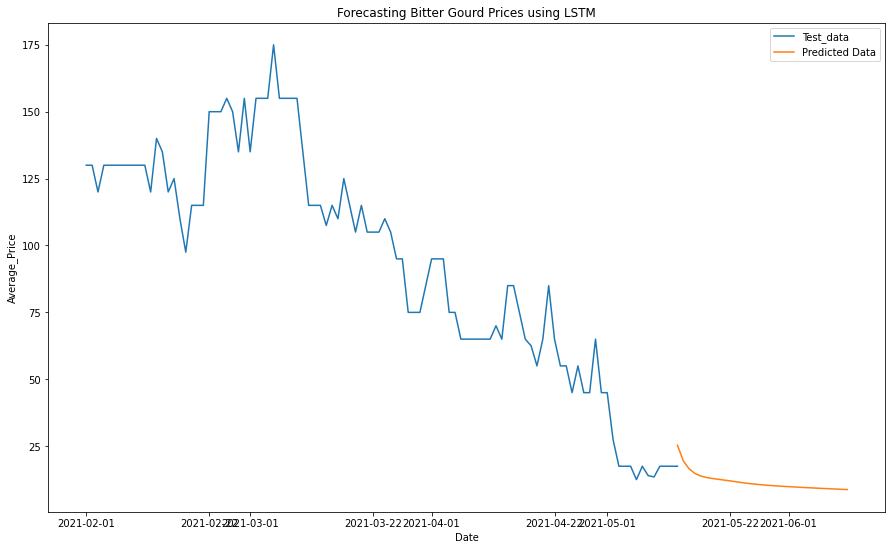

In [87]:
plt.figure(figsize=(15, 9))
plt.title("Forecasting Bitter Gourd Prices using LSTM")
plt.ylabel("Average_Price")
plt.xlabel("Date")
plt.plot(original['Date'], original['Average_Price'], label='Test_data')
plt.plot(df_forecast['Date'], df_forecast['Future_Prices'],label='Predicted Data')
plt.legend()

In [ ]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred): 
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') 
timeseries_evaluation_metrics_func(original['Average_Price'][20:], df_forecast['Future_Prices'])

Evaluation metric results:-
MSE is : 153.81172463836006
MAE is : 8.59797465416693
RMSE is : 12.402085495526954
MAPE is : 10.762221264538221
R2 is : 0.9029424423380011

